In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/house_district_forecast.csv")

In [3]:
df.head()

,forecastdate,state,district,special,candidate,party,incumbent,model,win_probability,voteshare,p10_voteshare,p90_voteshare
0,2018-08-01,AK,1,NaN,Don Young,R,True,classic,0.7185,49.35,43.04,55.59
1,2018-08-01,AK,1,NaN,Alyse S. Galvin,D,False,classic,0.2815,44.11,37.77,50.39
2,2018-08-01,AK,1,NaN,Others,NaN,False,classic,0.0000,6.54,2.60,11.17
3,2018-08-01,AL,1,NaN,Bradley Byrne,R,True,classic,0.9993,64.90,59.71,69.94
4,2018-08-01,AL,1,NaN,Robert Kennedy Jr.,D,False,classic,0.0007,35.10,30.06,40.29


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302859 entries, 0 to 302858
Data columns (total 12 columns):
forecastdate       302859 non-null object
state              302859 non-null object
district           302859 non-null int64
special            0 non-null float64
candidate          302859 non-null object
party              283602 non-null object
incumbent          302859 non-null bool
model              302859 non-null object
win_probability    302859 non-null float64
voteshare          302859 non-null float64
p10_voteshare      302859 non-null float64
p90_voteshare      302859 non-null float64
dtypes: bool(1), float64(5), int64(1), object(5)
memory usage: 25.7+ MB


In [5]:
df.describe()

,district,special,win_probability,voteshare,p10_voteshare,p90_voteshare
count,302859.000000,0.0,302859.000000,302859.000000,302859.000000,302859.000000
mean,9.641635,NaN,0.421354,42.163495,37.157514,47.254966
std,10.260220,NaN,0.453051,24.946290,24.353250,25.456194
min,1.000000,NaN,0.000000,0.000000,-4.650000,-1.220000
25%,3.000000,NaN,0.000100,23.950000,18.100000,30.340000
50%,6.000000,NaN,0.127800,44.430000,39.070000,49.830000
75%,12.000000,NaN,0.992600,60.880000,54.890000,66.720000
max,53.000000,NaN,1.000000,100.000000,100.000000,100.000000


In [6]:
df['party'].value_counts()

D                         129948
R                         116745
LIB                        17982
IND                         3822
GRE                         2439
I                           2058
G                           1764
REF                         1764
L                           1188
AME                          882
CON                          882
US Taxpayers                 882
NPA                          588
Working Class                588
WOF                          294
Independence Party           294
Mountain                     294
Legal Marijuana Now          294
Reform Party                 294
DPD                          294
IPO                          294
Women's Equality Party        12
Name: party, dtype: int64

In [7]:
import matplotlib.pyplot as plt

In [8]:
dfplot = df.drop(columns=['special','incumbent'])

In [9]:
dfplot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302859 entries, 0 to 302858
Data columns (total 10 columns):
forecastdate       302859 non-null object
state              302859 non-null object
district           302859 non-null int64
candidate          302859 non-null object
party              283602 non-null object
model              302859 non-null object
win_probability    302859 non-null float64
voteshare          302859 non-null float64
p10_voteshare      302859 non-null float64
p90_voteshare      302859 non-null float64
dtypes: float64(4), int64(1), object(5)
memory usage: 23.1+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000187460E53C8>,
      dtype=object)

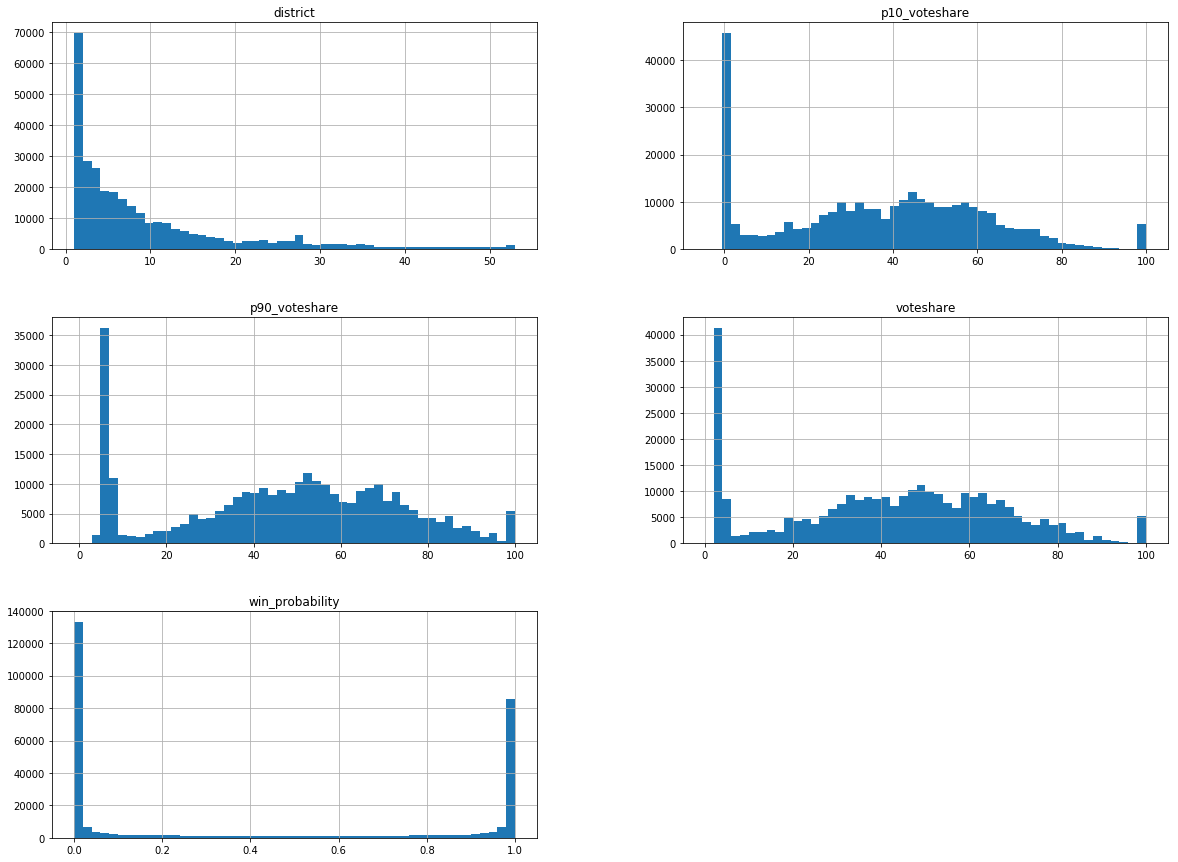

In [10]:
dfplot.hist(bins=50,figsize=(20,15))

In [11]:
df["state_district"] = df["state"].map(str)+"_"+df["district"].map(str)

In [12]:
df["voteshare"].value_counts()/len(df)

100.00    0.017473
3.24      0.005210
3.18      0.004160
3.31      0.003427
3.04      0.003213
2.93      0.003120
2.87      0.003001
3.41      0.003001
2.81      0.002496
2.80      0.002318
3.44      0.002268
2.94      0.002199
3.49      0.002159
3.02      0.002143
3.48      0.002140
3.22      0.002130
3.33      0.002080
3.01      0.002060
3.98      0.002021
3.54      0.002011
3.39      0.001975
2.83      0.001951
2.54      0.001941
4.29      0.001866
3.36      0.001793
3.09      0.001714
2.98      0.001654
3.69      0.001595
2.89      0.001496
3.11      0.001407
            ...   
88.67     0.000003
88.83     0.000003
87.53     0.000003
91.43     0.000003
5.94      0.000003
96.20     0.000003
8.64      0.000003
86.70     0.000003
92.81     0.000003
87.36     0.000003
88.63     0.000003
90.94     0.000003
87.45     0.000003
92.31     0.000003
93.88     0.000003
94.05     0.000003
87.59     0.000003
87.41     0.000003
95.25     0.000003
92.19     0.000003
96.08     0.000003
96.80     0.

To categorize the data for voteshare we create a new column called votershare. In order to keep the no of categories to low we divide the voteshare by 10. we mainly calculate this to get stratified sampling everytime

In [13]:
import numpy as np
df["voteshare_cat"] = np.ceil(df["voteshare"]/10)
df["voteshare_cat"].value_counts()/len(df)

1.0     0.174632
5.0     0.153666
6.0     0.143740
4.0     0.139837
7.0     0.136380
3.0     0.081203
8.0     0.069263
2.0     0.045899
9.0     0.033431
10.0    0.021934
0.0     0.000013
Name: voteshare_cat, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2,random_state=42)
for train_index, test_index in split.split(df,df["voteshare_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [15]:
for set in (strat_train_set,strat_test_set):
    set.drop(["voteshare_cat"], axis=1, inplace=True)
    

In [16]:
data_train = strat_train_set.copy()

In [17]:
correlation_matrix = data_train.corr()
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242287 entries, 268221 to 137396
Data columns (total 13 columns):
forecastdate       242287 non-null object
state              242287 non-null object
district           242287 non-null int64
special            0 non-null float64
candidate          242287 non-null object
party              226874 non-null object
incumbent          242287 non-null bool
model              242287 non-null object
win_probability    242287 non-null float64
voteshare          242287 non-null float64
p10_voteshare      242287 non-null float64
p90_voteshare      242287 non-null float64
state_district     242287 non-null object
dtypes: bool(1), float64(5), int64(1), object(6)
memory usage: 24.3+ MB


In [18]:
correlation_matrix["win_probability"].sort_values(ascending=False)

win_probability    1.000000
p10_voteshare      0.867031
voteshare          0.862565
p90_voteshare      0.856851
incumbent          0.837702
district           0.048895
special                 NaN
Name: win_probability, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000187434AF710>,
      dtype=object)

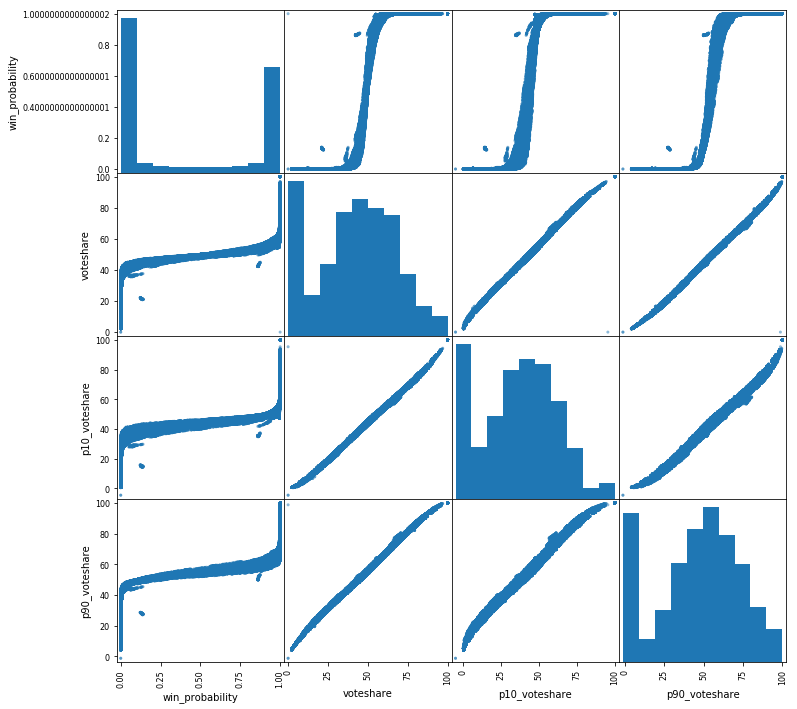

In [19]:
from pandas.plotting import scatter_matrix

attributes = ["win_probability","state_district","party","voteshare","p10_voteshare","p90_voteshare"]
scatter_matrix(data_train[attributes],figsize=(12,12))

we can see a strong correlation between winning probability and voteshare a candidate has in their respective districts

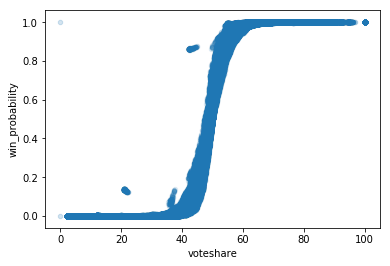

In [20]:
df.plot(kind="scatter", x="voteshare", y="win_probability",alpha=0.1)
plt.show()

Since the data has no null values except for "special" column, we are dropping the column. As it is has no correlation with win_probability too.

In [21]:
data_train.drop("special",axis=1)

,forecastdate,state,district,candidate,party,incumbent,model,win_probability,voteshare,p10_voteshare,p90_voteshare,state_district
268221,2018-10-04,MA,2,Tracy Lovvorn,R,False,lite,0.0003,25.83,18.87,32.82,MA_2
246253,2018-09-13,CA,6,Doris O. Matsui,D,True,lite,1.0000,78.40,73.69,83.11,CA_6
206983,2018-08-05,VA,2,Scott Taylor,R,True,lite,0.7861,53.43,47.86,59.10,VA_2
265335,2018-10-01,NJ,7,Others,NaN,False,lite,0.0000,2.85,0.83,5.38,NJ_7
59872,2018-09-28,CA,43,Omar Navarro,R,False,classic,0.0000,20.69,15.58,25.84,CA_43
197008,2018-11-02,HI,1,Ed Case,D,False,deluxe,1.0000,68.66,62.95,74.31,HI_1
105436,2018-08-05,KY,4,Seth Hall,D,False,deluxe,0.0009,34.45,29.31,39.55,KY_4
274300,2018-10-10,IL,4,"Jesus ""Chuy"" Garcia",D,False,lite,1.0000,83.31,76.52,90.11,IL_4
297629,2018-11-01,VA,5,Leslie Cockburn,D,False,lite,0.5152,50.14,45.50,54.78,VA_5
194609,2018-10-30,VA,1,Vangie Williams,D,False,deluxe,0.0153,41.56,36.81,46.30,VA_1


We will create two dataframes out of the df which has predictors and labels. As we dont want to apply transformation for target values. And we are dropping all the columns that might be irrelevant as per the correlation matrix too.

In [41]:
df_predictors = strat_train_set.drop(["win_probability","forecastdate","special","candidate","incumbent","model"],axis=1)
df_predictors_labels = strat_train_set["win_probability"].copy()

to make use of text data we need to convert it into numerical form. Here we will convert state, party into numerical form.

In [42]:
from sklearn.preprocessing import LabelEncoder
encoder_party = LabelEncoder()
party_cat = df_predictors["party"]
party_cat_encoded = encoder_party.fit_transform(party_cat.astype(str))
party_cat_encoded

array([15,  2, 15, ..., 22,  2,  2])

In [23]:
print(encoder_party.classes_)

['AME' 'CON' 'D' 'DPD' 'G' 'GRE' 'I' 'IND' 'IPO' 'Independence Party' 'L'
 'LIB' 'Legal Marijuana Now' 'Mountain' 'NPA' 'R' 'REF' 'Reform Party'
 'US Taxpayers' 'WOF' "Women's Equality Party" 'Working Class' 'nan']


In [43]:
encoder = LabelEncoder()
state_cat = df_predictors["state"]
state_cat_encoded = encoder.fit_transform(state_cat.astype(str))
state_cat_encoded

array([18,  4, 44, ..., 12, 39, 18])

In [25]:
print(encoder.classes_)

['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DE' 'FL' 'GA' 'HI' 'IA' 'ID' 'IL'
 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT' 'NC' 'ND'
 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD' 'TN'
 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY']


We are creating two categories of columns in-order to transform them in data pipeline. We are removing all the non-numerical columns and also the target value column "win_probability". We have only categorial columns that are strings "party" and "state_district"

In [45]:
cat_attributes = ["party","state_district","state"]

Generally in the pipeline we an use different transformations that ssklearn provides us with but since data seems tobe pretty consistent for this dataset. So we wont be using imputer or standard scaler. But we will be using LabelEncoder for string categorial data. FaetureUnion from scikit learn makes it simple to run multiple tranformation on data parallely.  

In [46]:
from sklearn.pipeline import FeatureUnion,make_pipeline

Since we have multiple label columns, we might need a multiple column label encoder. sklearn supports multilabelencoder but not multilabelencoder. The solution is influenced by this answer in stackoverflow (https://stackoverflow.com/questions/24458645/label-encoding-across-multiple-columns-in-scikit-learn). Check "data.py" for implementation.

In [47]:
from data import MultiColumnLabelEncoder
df_predictors_prepared = MultiColumnLabelEncoder(cat_attributes).fit_transform(df_predictors)

Since we are predicting a target numeric value this falls under regression task. We can use Linear regression, multivariate regression, Decision Trees and Random Forests. Let's try out some.

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
linReg = LinearRegression()
linReg.fit(df_predictors_prepared,df_predictors_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [50]:
ex_data = df_predictors.iloc[:8]
ex_label = df_predictors_labels.iloc[:8]
ex_prepared = MultiColumnLabelEncoder(cat_attributes).fit_transform(ex_data)

In [51]:
print(linReg.predict(ex_prepared))

[-0.00507573  0.95130439  0.52517114 -0.27245402 -0.09946184  0.75951372
  0.1645806   1.00499142]


In [52]:
print(list(ex_label))

[0.0003, 1.0, 0.7861, 0.0, 0.0, 1.0, 0.0009, 1.0]


In [54]:
from sklearn.metrics import mean_squared_error
df_predictions = linReg.predict(df_predictors_prepared)
linMse = mean_squared_error(df_predictors_labels,df_predictions)
linRmse = np.sqrt(linMse)
linRmse

0.2098627066362218

We experimented with Linear regression here. We took a sample data of 8 samples and predicted their target values. And compared them to the actual values. We can see there is lot of descrepency. So lets try Decision trees.

In [53]:
from sklearn.tree import DecisionTreeRegressor
dtreeReg = DecisionTreeRegressor()
dtreeReg.fit(df_predictors_prepared,df_predictors_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [55]:
df_predictions = dtreeReg.predict(df_predictors_prepared)
dtreeMse = mean_squared_error(df_predictors_labels,df_predictions)
dtreeRmse = np.sqrt(dtreeMse)
dtreeRmse

0.00022688640707967247

That is surprisingly low. But we may have overfit the model. Lets try it with Random forests.

In [57]:
from sklearn.ensemble import RandomForestRegressor
rfReg = RandomForestRegressor()
rfReg.fit(df_predictors_prepared,df_predictors_labels)
df_predictions = rfReg.predict(df_predictors_prepared)
rfRegMse = mean_squared_error(df_predictors_labels,df_predictions)
rfRegRmse = np.sqrt(rfRegMse)
rfRegRmse

C:\Users\pavani\Anaconda3\envs\ml_env\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.001995075265844581

Now is the time to test it with test data. Lets finalize the model to be Random Forests. Keep in mind this might not be a real life scenario as you may want to tweak a bit till you find the best model.

In [59]:
X_test = strat_test_set.drop(["win_probability","forecastdate","special","candidate","incumbent","model"],axis=1)
y_test = strat_test_set["win_probability"].copy()
X_test_prepared = MultiColumnLabelEncoder(cat_attributes).fit_transform(X_test)
final_predictions = rfReg.predict(X_test_prepared)
final_mse = mean_squared_error(y_test,final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

0.004106678952186565